# 01 Importing Libraries and Data Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import scipy
from scipy import stats

In [2]:
# Assigning a path
path = r'/Users/dramblys/Desktop/Achievement 6/World Happiness Project'

In [3]:
# Import Data
df_whp=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHP.csv'))

In [4]:
%matplotlib inline

# 02 Checking and Cleaning Q2

In [5]:
df_whp.shape

(2089, 12)

In [6]:
df_whp.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [7]:
# Dropping non numeric columns
df_whp_num_only = df_whp.drop(columns = ['Country name','year'])

In [8]:
df_whp_num_only.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government'],
      dtype='object')

In [9]:
# Check for missing values
df_whp_num_only.isnull().sum()

Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [10]:
# Create subset/new df without missing
df_whp_num_only_nonan = df_whp_num_only[~df_whp_num_only.isnull().any(axis=1)]

In [11]:
df_whp_num_only_nonan.shape

(1747, 10)

In [12]:
# Checking scales of different variables
df_whp_num_only_nonan.head(10)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
5,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847
6,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048
7,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557
8,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990
9,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179


# 03 Elbow Technique Q3

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_whp_num_only_nonan).score(df_whp_num_only_nonan) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/dramblys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dramblys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dramblys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dramblys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/d

[-97110.13240942048,
 -29888.338244211758,
 -17681.36660450327,
 -12429.43110513057,
 -8888.409078124747,
 -6446.0120928504675,
 -5276.574800173459,
 -4322.7581615085855,
 -3808.3679822323643]

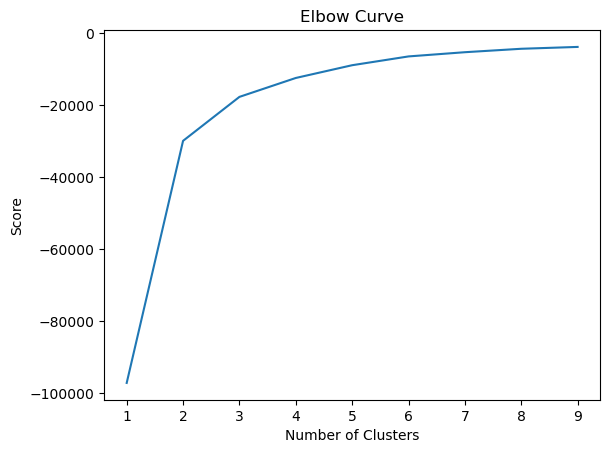

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Q4: The curve begins to flatten out at around 3, so I picked 3 as my number of clusters. 

# 04 k-Means Clustering

### 4.1 Running k-means algo Q5

In [16]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [17]:
# Fit the k-means object to the data.
kmeans.fit(df_whp_num_only_nonan)

/Users/dramblys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### 4.2 Creating "clusters' column Q6

In [18]:
df_whp_num_only_nonan['clusters'] = kmeans.fit_predict(df_whp_num_only_nonan)

/Users/dramblys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/vk/7j6xs_wx4g377fxvjj1tbnxr0000gn/T/ipykernel_91022/3965511645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whp_num_only_nonan['clusters'] = kmeans.fit_predict(df_whp_num_only_nonan)


In [19]:
df_whp_num_only_nonan.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,clusters
0,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,2
1,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,2
2,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,2
3,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,2
4,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,2


In [20]:
df_whp_num_only_nonan['clusters'].value_counts()

1    700
0    623
2    424
Name: clusters, dtype: int64

### 4.3 Creating Vizualisations (scatterplots) Q7

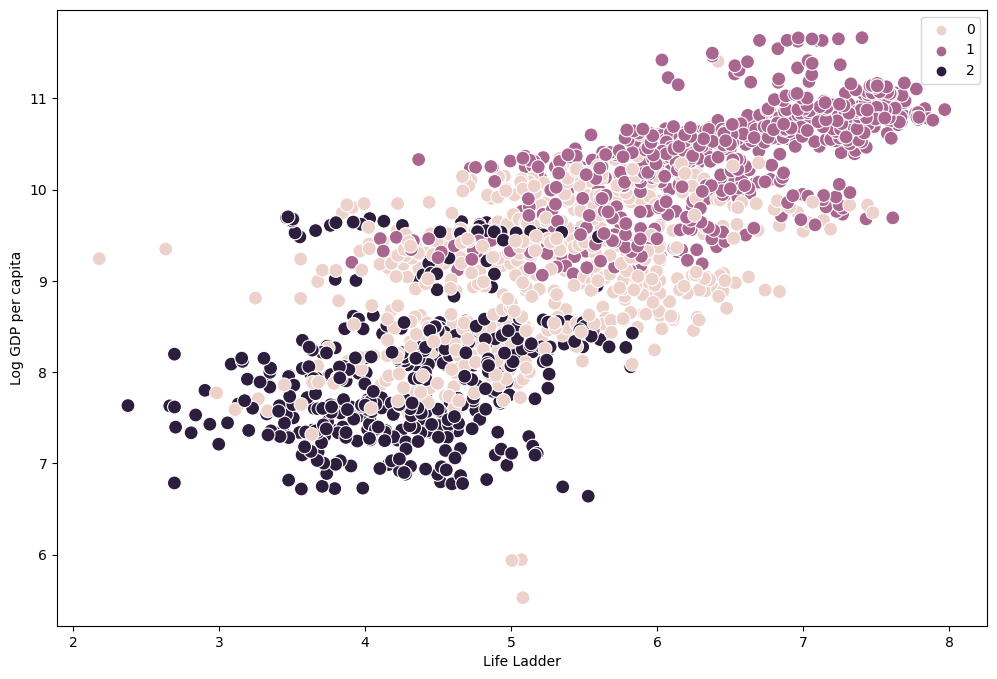

In [21]:
# Plot the clusters for the "Life Ladder" and "Log GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Log GDP per capita'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Log GDP per capita') 
plt.show()

Q8: The clusters are quite clear here, although not completely separate - higher GDP countries report higher Life Ladder scores in general, but it is not a clear cut rule. While there is no dark purple below 9 GDP and much below 4 o the Life Ladder and no purple above 10 GDP and 6 on Life Ladder, you can find all three colors right around 9 GDP or 4-6 on the Life Ladder. 

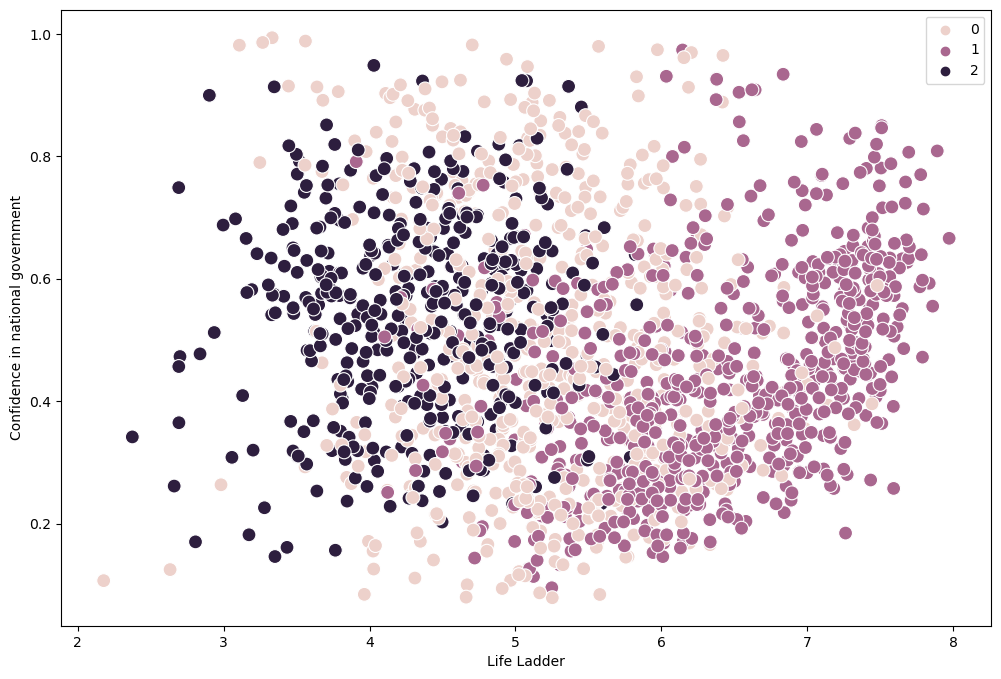

In [22]:
# Plot the clusters for the "Life Ladder" and "Confidence in national government" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Confidence in national government'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Confidence in national government') 
plt.show()

Q8: The clusters are even less clear here. While it is clear that darker purple report higher scores on the Life ladder than purple, confidence in government is all over the place. Although, purpe cluster seems to be relatively higher in confidence than dark purple.

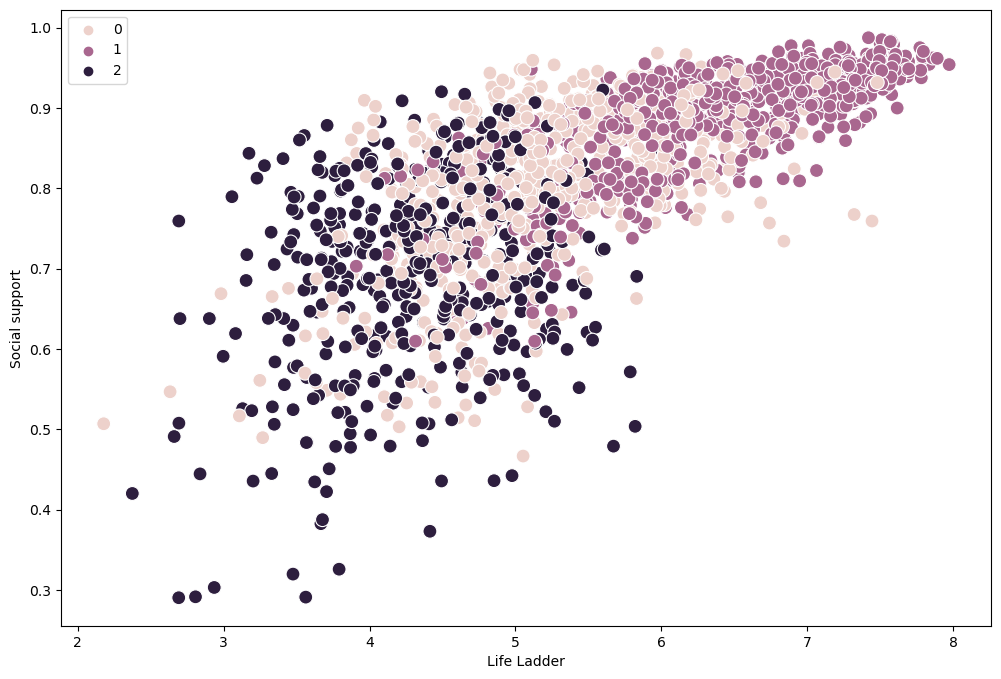

In [23]:
# Plot the clusters for the "Life Ladder" and "Social support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Social support'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Social support') 
plt.show()

Q8: Again, clusters are not super expressed, but dark purple is highest on both factors, while purple - lowest on both. 

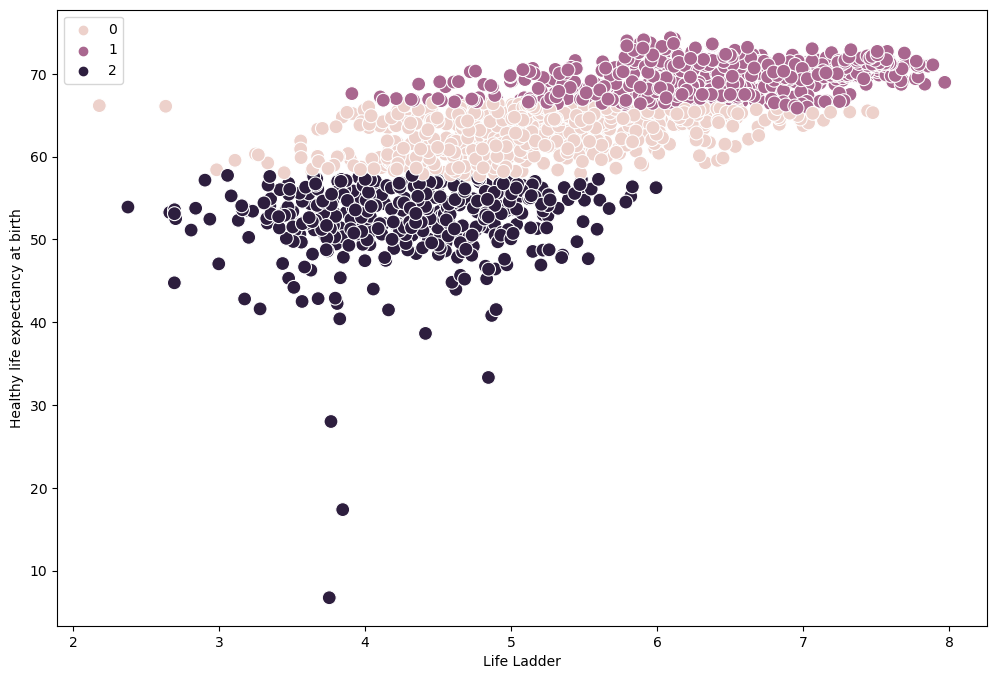

In [24]:
# Plot the clusters for the "Life Ladder" and "Healthy life expectancy at birth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Healthy life expectancy at birth'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Healthy life expectancy at birth') 
plt.show()

Q8: Age is easy to cluster, so the clusters are much more pronounced here. The general tendency is the same, as before, but each age cluster is quite wide on the Ladder.

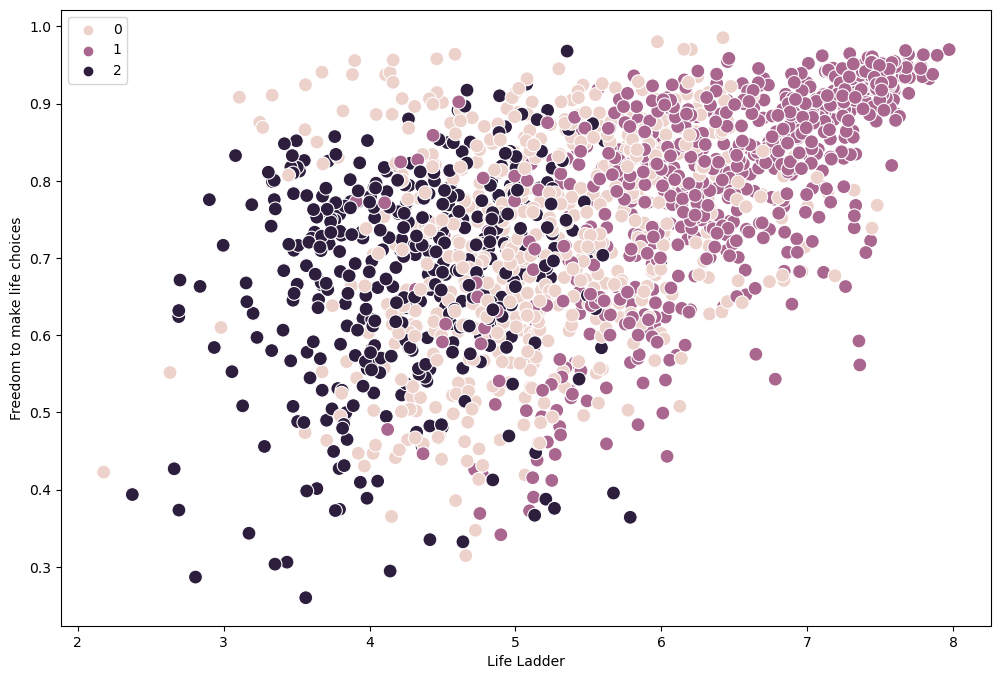

In [25]:
# Plot the clusters for the "Life Ladder" and "Freedom to make life choices" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Freedom to make life choices'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Freedom to make life choices') 
plt.show()

Q8: Again, general tendency the same, but clusters are not very clear. 

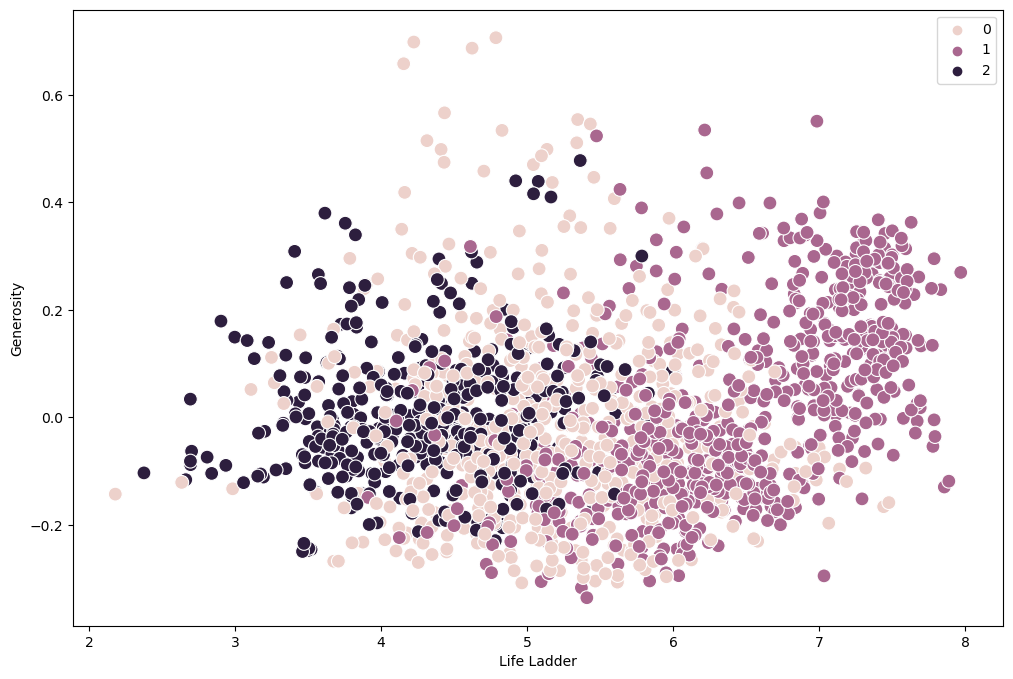

In [26]:
# Plot the clusters for the "Life Ladder" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Generosity'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Generosity') 
plt.show()

Q8: The data here is clustering only in terms of the Life Ladder and seems to have no signoficant trend in terms of generosity. if anything, midddle (pink) cluster seems to be lowest for that factor, rather than purple or dark purple. 

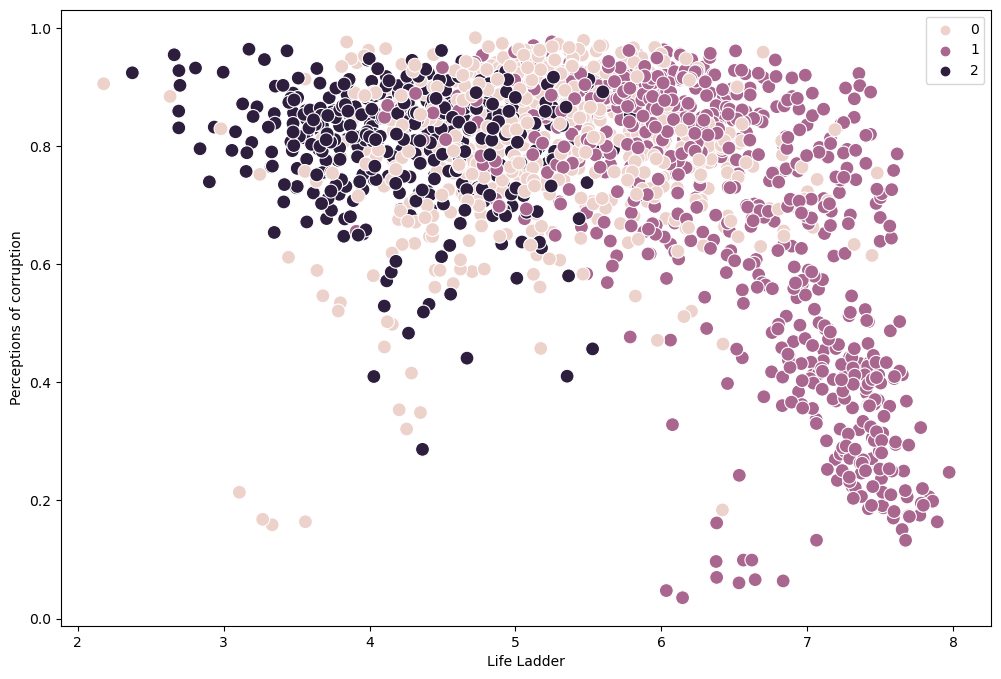

In [27]:
# Plot the clusters for the "Life Ladder" and "Perceptions of corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Perceptions of corruption'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Perceptions of corruption') 
plt.show()

Q8: Purple - high corruptiona and low Happiness scores; pink - high corruption and average Happiness scores; dark purple - in general, the higher perception of corruption , the lower Happiness score, but there is a small sub-cluster, where corruption is very low, but Happiness scores are still very low. there is also a small sub-cluster where both are very low. 

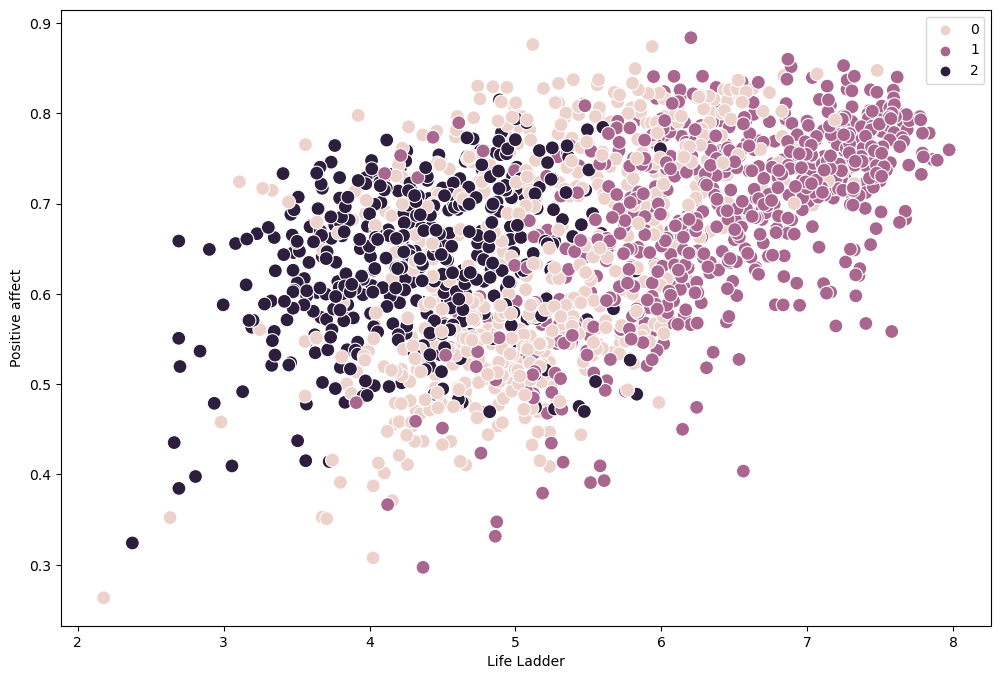

In [28]:
# Plot the clusters for the "Life Ladder" and "Positive affect" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Positive affect'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Positive affect') 
plt.show()

Q8: Same general tendency. 

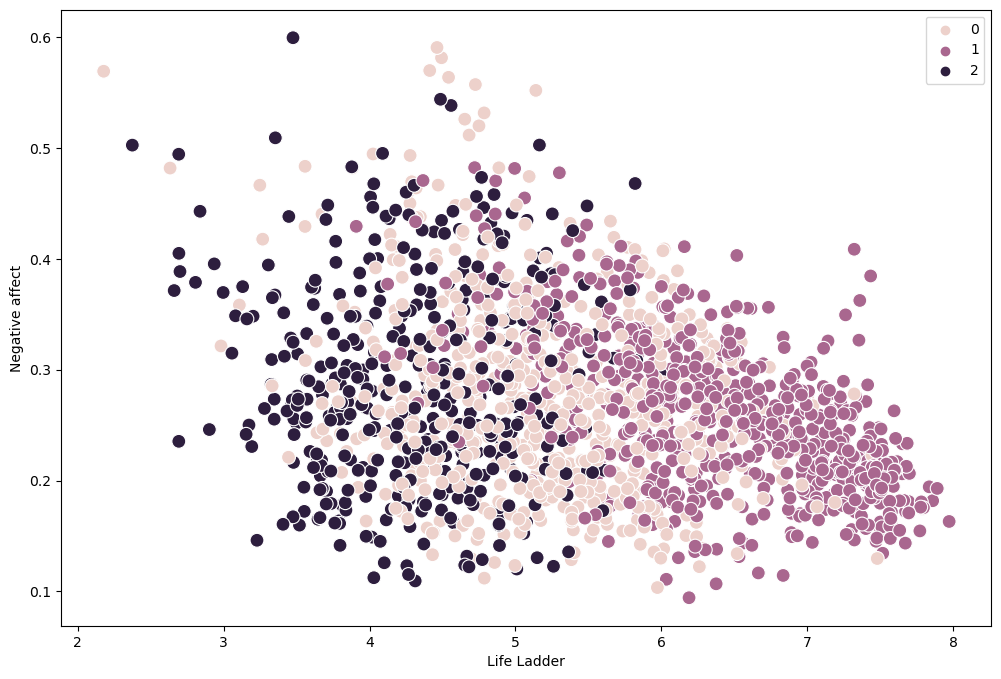

In [29]:
# Plot the clusters for the "Life Ladder" and "Negative affect" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Life Ladder'], y=df_whp_num_only_nonan['Negative affect'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Life Ladder') 
plt.ylabel('Negative affect') 
plt.show()

Q8: The core of dark purple is around low negativity and high Happiness. the other two are lower on Life Ladder, but no significant difference in negativity between the two. 

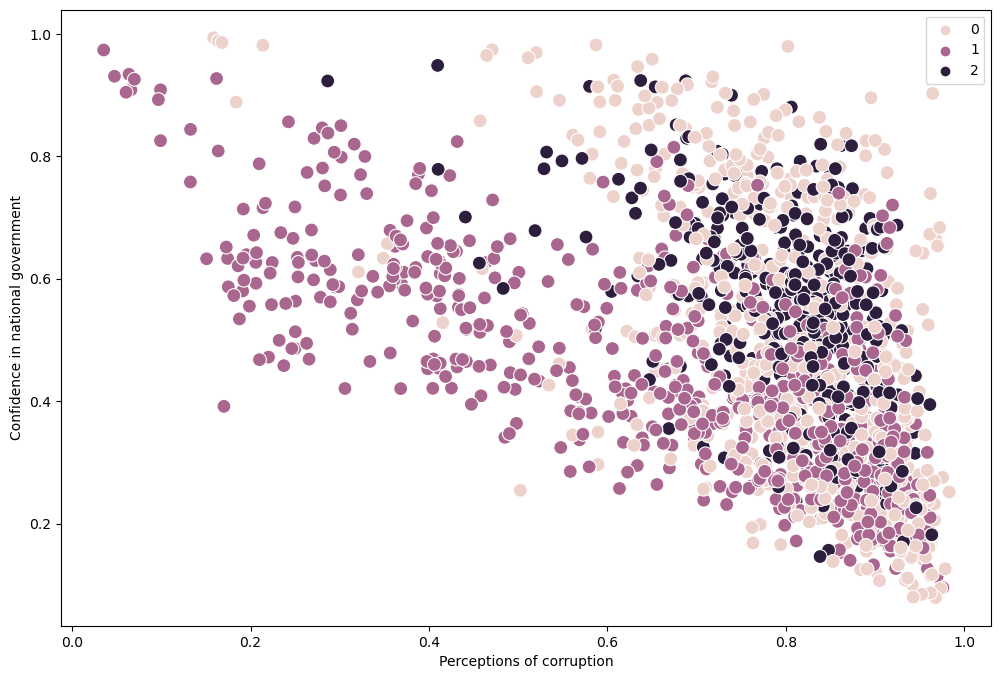

In [30]:
# Plot the clusters for the "Perceptions of corruption" and "Confidence in national government" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_whp_num_only_nonan['Perceptions of corruption'], y=df_whp_num_only_nonan['Confidence in national government'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Perceptions of corruption') 
plt.ylabel('Confidence in national government') 
plt.show()

Q8: Each cluster has the same general trend - the lower perception of corruption, the higher confidence in government. But while dark purple observations are across the entire range of noth factors, both purple and pink clusters a skewed towards higher corruption side. Pink has most observations where one does nt expect many - where both corruption and confidence in government are high. 

### 4.4 Calculating stats using Groupby() Q9

In [31]:
df_whp_num_only_nonan.loc[df_whp_num_only_nonan['clusters'] == 2, 'cluster'] = 'dark purple'
df_whp_num_only_nonan.loc[df_whp_num_only_nonan['clusters'] == 1, 'cluster'] = 'purple'
df_whp_num_only_nonan.loc[df_whp_num_only_nonan['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/vk/7j6xs_wx4g377fxvjj1tbnxr0000gn/T/ipykernel_91022/167603119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whp_num_only_nonan.loc[df_whp_num_only_nonan['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
df_whp_num_only_nonan.groupby('cluster').agg({'Life Ladder':['mean', 'median'],'Log GDP per capita':['mean', 'median'], 
                         'Social support':['mean', 'median'],'Healthy life expectancy at birth':['mean', 'median'],
                        'Freedom to make life choices':['mean', 'median'],'Generosity':['mean', 'median'],
                        'Perceptions of corruption':['mean', 'median'],'Positive affect':['mean', 'median'],
                        'Negative affect':['mean', 'median'],'Confidence in national government':['mean', 'median']})

Life Ladder           Log GDP per capita             \
                   mean    median               mean     median   
cluster                                                           
dark purple    4.309509  4.337101           7.972770   7.929100   
pink           5.201562  5.153990           9.125078   9.238946   
purple         6.426042  6.452341          10.372884  10.496653   

            Social support           Healthy life expectancy at birth  \
                      mean    median                             mean   
cluster                                                                 
dark purple       0.694463  0.711035                        52.433979   
pink              0.803260  0.821299                        62.940345   
purple            0.889735  0.909815                        69.463171   

                       Freedom to make life choices           Generosity  \
                median                         mean    median       mean   
cluster                                                                    
dark purple  53.210001                     0.679061  0.708146   0.002910   
pink         63.500000                     0.725458  0.733004  -0.016339   
purple       69.760002                     0.805024  0.832584   0.018960   

                      Perceptions of corruption           Positive affect  \
               median                      mean    median            mean   
cluster                                                                     
dark purple -0.012871                  0.806892  0.824024        0.631745   
pink        -0.046349                  0.800796  0.814568        0.638318   
purple      -0.010167                  0.676224  0.763465        0.690755   

                      Negative affect            \
               median            mean    median   
cluster                                           
dark purple  0.638467        0.284381  0.268328   
pink         0.638377        0.275472  0.268023   
purple       0.713959        0.256122  0.245635   

            Confidence in national government            
                                         mean    median  
cluster                                                  
dark purple                          0.539991  0.551521  
pink                                 0.497838  0.467046  
purple                               0.438823  0.416916

Q10: If every factor was a clear predictor of the Life Ladder score, all the scatterplots would look similar and the clusters would be much more precise/pronounced. Since every (most) graph looks different, it means not every factor has the same impact on the Happiness and the mix of factors is very different for each score on the Ladder. Future steps could include figuring out how much each factor seems to have impacted the Happiness score and how things changed (if they did) over time. 

# 05 Exporting

In [33]:
# exporting df_whp_num_only_nonan - a df with clusters
df_whp_num_only_nonan.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_whp_num_only_nonan_clusters.csv'))